In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from tqdm import tqdm
import re

from collections import Counter
from collections import defaultdict

from catboost import CatBoostRegressor, Pool
from scipy.stats import normaltest

import optuna
from optuna.samplers import TPESampler


from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train_result = pd.read_csv('data/df_train_result_from_eda_2.csv')

In [3]:

def safe_literal_eval(x):
    if isinstance(x, list):
        return x 
    elif isinstance(x, str):
        try:
            return literal_eval(x)
        except:
            return np.nan
    else:
        return np.nan


In [4]:
df_train_result['clustered_skills'] = df_train_result['clustered_skills'].apply(safe_literal_eval)


In [5]:
df_train_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17398 entries, 0 to 17397
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       17398 non-null  int64  
 1   salary from                      17398 non-null  float64
 2   salary to                        17398 non-null  float64
 3   position                         17398 non-null  object 
 4   experience                       17398 non-null  object 
 5   skills                           17398 non-null  object 
 6   schedule                         17398 non-null  object 
 7   employment                       17398 non-null  object 
 8   vacancy                          17398 non-null  object 
 9   level                            17398 non-null  object 
 10  region                           17398 non-null  object 
 11  mapped_skills                    17398 non-null  object 
 12  anchors_list      

In [ ]:

def filtered_skills_top_n(df_train_result, n):
    """
    –§–∏–ª—å—Ç—Ä—É–µ—Ç –Ω–∞–≤—ã–∫–∏, –æ—Å—Ç–∞–≤–ª—è—è —Ç–æ–ª—å–∫–æ N –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –Ω–∞–≤—ã–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –ø–æ–∑–∏—Ü–∏–∏.
    
    :param df_skills_filtered: –í—Ö–æ–¥—è—â–∏–π DataFrame —Å –∫–æ–ª–æ–Ω–∫–∞–º–∏ 'position' –∏ 'skills'.
    :param n: –ß–∏—Å–ª–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –Ω–∞–≤—ã–∫–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –Ω—É–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å.
    :return: –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–π DataFrame —Å —Å–æ–∫—Ä–∞—â—ë–Ω–Ω—ã–º —Å–ø–∏—Å–∫–æ–º –Ω–∞–≤—ã–∫–æ–≤.
    """
    
    result_df = df_train_result.copy()
    #display(result_df['skills'])
    # –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –∫–∞–∂–¥—É—é —É–Ω–∏–∫–∞–ª—å–Ω—É—é –¥–æ–ª–∂–Ω–æ—Å—Ç—å
    for pos in result_df['position'].unique():
        # –ú–∞—Å–∫–∞ –¥–ª—è –≤—ã–±–æ—Ä–∞ —Å—Ç—Ä–æ–∫ —Å –Ω—É–∂–Ω–æ–π –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é
        mask = result_df['position'] == pos
        
        # –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –Ω–∞–≤—ã–∫–∏ –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Å–ø–∏—Å–æ–∫
        skills_lists = result_df.loc[mask, 'clustered_skills']
        all_skills = [skill for sublist in skills_lists for skill in sublist]
        
        # –°—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –ø–æ—è–≤–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–≤—ã–∫–∞
        skill_counts = Counter(all_skills)
        
        # –ë–µ—Ä—ë–º —Ç–æ–ø-n –Ω–∞–≤—ã–∫–æ–≤
        top_n_skills = set([skill for skill, _ in skill_counts.most_common(n)])
        
        # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ–∏–ª—å—Ç—Ä –∫ —Å–ø–∏—Å–∫—É –Ω–∞–≤—ã–∫–æ–≤
        result_df.loc[mask, 'clustered_skills'] = skills_lists.apply(
            lambda skill_list: [s for s in skill_list if s in top_n_skills]
        )
        #display(result_df['skills'])
    return result_df
from scipy.stats import normaltest



In [9]:
# –§—É–Ω–∫—Ü–∏—è –æ—á–∏—Å—Ç–∫–∏ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
def process_series(series, colname, position):
    series = pd.to_numeric(series, errors='coerce')
    series = series.dropna()
    n_total = len(series)


    stat, p = normaltest(series)
    is_normal = p > 0.05

    if is_normal:
        mu, sigma = series.mean(), series.std()
        mask = (series >= mu - 3 * sigma) & (series <= mu + 3 * sigma)
    else:
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        mask = (series >= q1 - 1.5 * iqr) & (series <= q3 + 1.5 * iqr)

    n_filtered = mask.sum()
    n_removed = n_total - n_filtered


    return series[mask]

Top-N Skills:   0%|          | 0/4 [00:00<?, ?it/s]

' –í–∑—è–ª–∏ 30 —Å–∫–∏–ª–æ–≤ . –û—Å—Ç–∞–ª–æ—Å—å 16881 c—Ç—Ä–æ–∫ –≤ df. –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö 704'

0:	learn: 41019.8152478	test: 39412.3777049	best: 39412.3777049 (0)	total: 34.7ms	remaining: 34.7s
100:	learn: 21365.9230749	test: 21909.1943677	best: 21909.1943677 (100)	total: 3.13s	remaining: 27.9s
200:	learn: 20783.9926448	test: 21811.2215210	best: 21811.2215210 (200)	total: 5.58s	remaining: 22.2s
300:	learn: 20380.5416013	test: 21722.6656141	best: 21721.8763579 (298)	total: 7.99s	remaining: 18.6s
400:	learn: 20122.0941840	test: 21678.9523654	best: 21676.1172975 (391)	total: 10.5s	remaining: 15.7s
500:	learn: 19896.6368899	test: 21658.6562350	best: 21652.4903330 (467)	total: 12.9s	remaining: 12.8s
600:	learn: 19681.0750438	test: 21617.1441761	best: 21609.8595906 (588)	total: 15.4s	remaining: 10.2s
700:	learn: 19461.3595686	test: 21578.9171183	best: 21576.8522819 (687)	total: 17.9s	remaining: 7.62s
800:	learn: 19331.1331265	test: 21580.8712423	best: 21575.2871036 (725)	total: 20.3s	remaining: 5.04s
900:	learn: 19140.7817782	test: 21557.4132702	best: 21555.6237889 (887)	total: 22.9s	

Top-N Skills:  25%|‚ñà‚ñà‚ñå       | 1/4 [01:43<05:11, 103.71s/it]

' –í–∑—è–ª–∏ 50 —Å–∫–∏–ª–æ–≤ . –û—Å—Ç–∞–ª–æ—Å—å 17189 c—Ç—Ä–æ–∫ –≤ df. –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö 1048'

0:	learn: 40712.2494141	test: 40080.9401725	best: 40080.9401725 (0)	total: 33ms	remaining: 33s
100:	learn: 21145.7540264	test: 21862.8954267	best: 21862.8954267 (100)	total: 2.98s	remaining: 26.6s
200:	learn: 20454.2071483	test: 21584.1204499	best: 21581.8319360 (199)	total: 5.26s	remaining: 20.9s
300:	learn: 20078.1954021	test: 21455.8588782	best: 21453.0946090 (298)	total: 7.54s	remaining: 17.5s
400:	learn: 19937.3658741	test: 21434.7311725	best: 21428.6940716 (352)	total: 9.64s	remaining: 14.4s
500:	learn: 19725.1104139	test: 21415.2454107	best: 21413.4387585 (452)	total: 11.9s	remaining: 11.8s
600:	learn: 19598.9184716	test: 21390.6391779	best: 21389.5602337 (599)	total: 13.9s	remaining: 9.21s
700:	learn: 19430.2909469	test: 21361.1977129	best: 21358.7265790 (666)	total: 16.1s	remaining: 6.87s
800:	learn: 19304.6244807	test: 21350.2321417	best: 21348.7319664 (794)	total: 18.2s	remaining: 4.53s
900:	learn: 19099.1485472	test: 21337.8890374	best: 21324.0974069 (844)	total: 20.5s	rema

Top-N Skills:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [03:21<03:20, 100.49s/it]

' –í–∑—è–ª–∏ 70 —Å–∫–∏–ª–æ–≤ . –û—Å—Ç–∞–ª–æ—Å—å 17296 c—Ç—Ä–æ–∫ –≤ df. –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö 1277'

0:	learn: 40643.0419938	test: 39981.3959347	best: 39981.3959347 (0)	total: 29ms	remaining: 29s
100:	learn: 21502.3373806	test: 22064.3579061	best: 22064.1015833 (99)	total: 2.71s	remaining: 24.1s
200:	learn: 20781.7749822	test: 21675.2614377	best: 21673.1154410 (199)	total: 4.91s	remaining: 19.5s
300:	learn: 20424.6343197	test: 21623.5782670	best: 21614.2874180 (286)	total: 7.03s	remaining: 16.3s
400:	learn: 20202.1754281	test: 21638.6428364	best: 21614.2874180 (286)	total: 9.08s	remaining: 13.6s
500:	learn: 19987.7598161	test: 21612.0766859	best: 21611.2035906 (495)	total: 11.1s	remaining: 11.1s
600:	learn: 19852.9988443	test: 21593.4953789	best: 21590.8078504 (588)	total: 13.1s	remaining: 8.71s
700:	learn: 19611.6249143	test: 21529.5373369	best: 21521.9562409 (671)	total: 15.2s	remaining: 6.5s
800:	learn: 19391.0340068	test: 21484.5690254	best: 21476.2043910 (779)	total: 17.5s	remaining: 4.35s
900:	learn: 19138.7812305	test: 21420.0089151	best: 21420.0089151 (900)	total: 19.8s	remain

Top-N Skills:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [05:00<01:39, 99.41s/it] 

' –í–∑—è–ª–∏ 100 —Å–∫–∏–ª–æ–≤ . –û—Å—Ç–∞–ª–æ—Å—å 17349 c—Ç—Ä–æ–∫ –≤ df. –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö 1539'

0:	learn: 40716.8447931	test: 39398.1167052	best: 39398.1167052 (0)	total: 70.9ms	remaining: 1m 10s
100:	learn: 21245.0558025	test: 22282.4547460	best: 22282.4547460 (100)	total: 3.08s	remaining: 27.4s
200:	learn: 20563.4358980	test: 22107.7689843	best: 22106.3014552 (196)	total: 5.41s	remaining: 21.5s
300:	learn: 20159.8100011	test: 22051.1578528	best: 22048.1398415 (296)	total: 7.68s	remaining: 17.8s
400:	learn: 19843.7563727	test: 21976.1480337	best: 21974.2097116 (397)	total: 10s	remaining: 15s
500:	learn: 19570.0213190	test: 21915.6655166	best: 21913.3023076 (495)	total: 12.2s	remaining: 12.2s
600:	learn: 19419.3144556	test: 21899.4671484	best: 21893.2997428 (584)	total: 14.3s	remaining: 9.5s
700:	learn: 19305.3422571	test: 21869.8175226	best: 21867.9723340 (676)	total: 16.4s	remaining: 6.99s
800:	learn: 19242.8527083	test: 21851.7628992	best: 21851.7628992 (800)	total: 18.6s	remaining: 4.62s
900:	learn: 19163.8421039	test: 21842.4548783	best: 21842.3600380 (898)	total: 20.6s	rema

Top-N Skills: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [06:38<00:00, 99.50s/it]


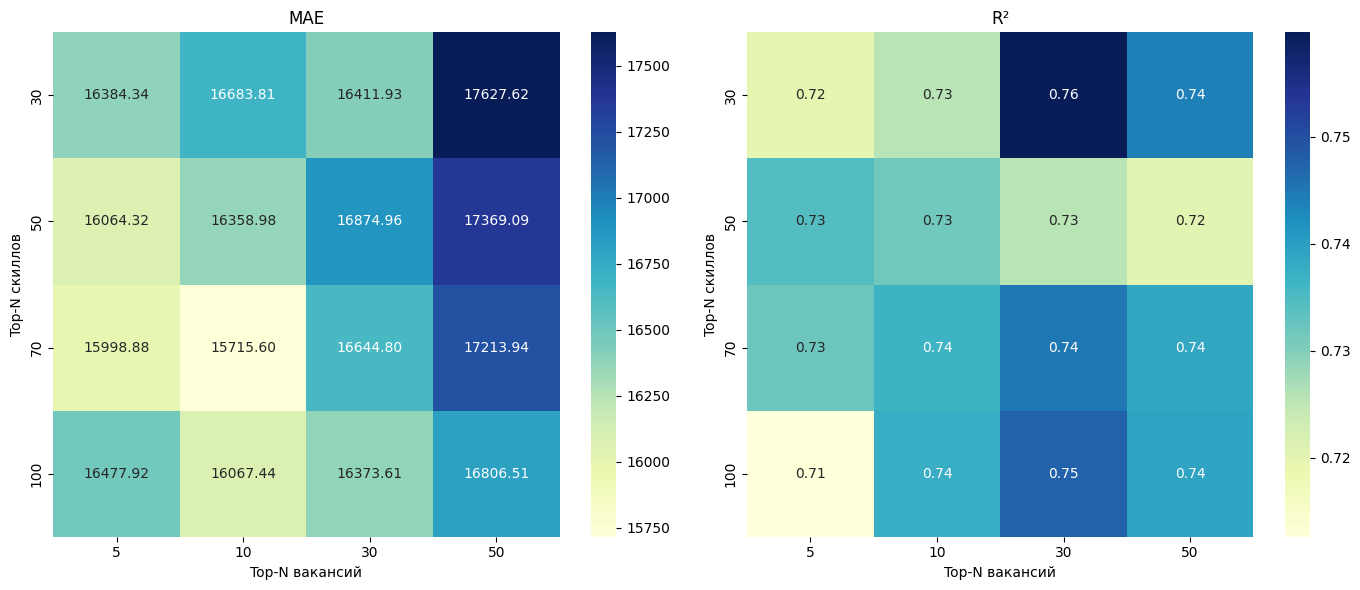

–õ—É—á—à–µ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ –ø–æ MAE:
Top Skills: 70.0, Top Vacancies: 10.0, MAE: 15715.60, R¬≤: 0.74


In [21]:

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='DataFrameGroupBy.apply operated on the grouping columns.')

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
top_skills_range = [ 30, 50, 70, 100]
top_vacancies_range = [5,10, 30, 50] 
# –°–ø–∏—Å–æ–∫ –ø–æ–∑–∏—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–ª—è–µ–º

allowed_positions2 = [
    "–ê–Ω–∞–ª–∏—Ç–∏–∫",
    "–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–î–∞—Ç–∞-—Å–∞–π–µ–Ω—Ç–∏—Å—Ç",
    "–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫",
    "–ü—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫",
    "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤",
    "–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å",
    '–¢–µ—Å—Ç–∏—Ä–æ–≤—â–∏–∫',
    '–ú–µ–Ω–µ–¥–∂–µ—Ä –ø—Ä–æ–¥—É–∫—Ç–∞',
    '–°–∏—Å—Ç–µ–º–Ω—ã–π –∏–Ω–∂–µ–Ω–µ—Ä',
    'BI-–∞–Ω–∞–ª–∏—Ç–∏–∫, –∞–Ω–∞–ª–∏—Ç–∏–∫ –¥–∞–Ω–Ω—ã—Ö',
    '–ú–µ—Ç–æ–¥–æ–ª–æ–≥',
    '–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –≥—Ä—É–ø–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏'

]




allowed_positions = [
    "–ê–Ω–∞–ª–∏—Ç–∏–∫",
    "–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫",
    #"–î–∞—Ç–∞-—Å–∞–π–µ–Ω—Ç–∏—Å—Ç",
    "–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫",
    #"–ü—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫",
    "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤",
    "–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä",
    #"–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å"
]

results = []

for skill_n in tqdm(top_skills_range, desc="Top-N Skills"):
    df_skills_filtered = filtered_skills_top_n(df_train_result.copy(), skill_n)
    #display(df_skills_filtered['skills'])
    # –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—É—Å—Ç—ã–º–∏ —Å–ø–∏—Å–∫–∞–º–∏ skills
    df_skills_filtered = df_skills_filtered[df_skills_filtered['clustered_skills'].apply(lambda x: len(x) > 0)]
    

    def flatten_skills(skills_series):
        all_skills = []
        for skill_list in skills_series:
            if isinstance(skill_list, list):
                all_skills.extend(skill_list)
        return all_skills
    #display(df_skills_filtered['skills'])
    display(f" –í–∑—è–ª–∏ {skill_n} —Å–∫–∏–ª–æ–≤ . –û—Å—Ç–∞–ª–æ—Å—å {df_skills_filtered.shape[0]} c—Ç—Ä–æ–∫ –≤ df. –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö {len(set(flatten_skills(df_skills_filtered['clustered_skills'])))}" )
    for vac_n in top_vacancies_range:
        # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –≤–∞–∫–∞–Ω—Å–∏–π –ø–æ top-N –≤–Ω—É—Ç—Ä–∏ –ø–æ–∑–∏—Ü–∏–∏
        def filter_top_vacancies(group, n=vac_n):
            vac_counts = group['vacancy_clustered'].value_counts()
            top_vacancies = vac_counts.head(n).index.tolist()
            #top_vacancies = vac_counts.index.tolist()
            return group[group['vacancy_clustered'].isin(top_vacancies)]
        


        df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)
        df_filtered = df_filtered[df_filtered['position'].isin(allowed_positions)]

        
        
        
        # –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        df_temp = df_filtered.copy()
        
        
        # –û—á–∏—Å—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
        positions_temp = df_temp['position'].dropna().unique()

        for pos in positions_temp:
            pos_mask = df_temp['position'] == pos
            clean_series = process_series(df_temp.loc[pos_mask, 'salary from'], 'salary from', pos)
            if clean_series is not None:
                df_temp.loc[clean_series.index, 'salary from norm'] = clean_series

        # –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏
        df_temp = df_temp.dropna(subset=['salary from norm'])
        
        
        if df_temp.empty:
            continue



        # 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
        y = df_temp['salary from norm']

        if df_temp.empty:
            continue
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ—Ä—è–¥–∫–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–ª—è experience –∏ level
        experience_order = {
            '–ù–µ—Ç –æ–ø—ã—Ç–∞': 0,
            '1‚Äì3 –≥–æ–¥–∞': 1,
            '3‚Äì6 –ª–µ—Ç': 2,
            '–ë–æ–ª–µ–µ 6 –ª–µ—Ç': 3,
            'Unknown': -1  # –∏–ª–∏ np.nan –¥–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
        }

        level_order = {
            'Trainee': 0,
            'Junior': 1,
            'Middle': 2,
            'Senior': 3,
            'Lead': 4,
            'Chief': 5,
            'Unknown': -1  # –∏–ª–∏ np.nan –¥–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
        }
        
        # –ü—Ä–∏–º–µ–Ω—è–µ–º –ø–æ—Ä—è–¥–∫–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
        df_temp['experience_ord'] = df_temp['experience'].map(experience_order) #.astype(str)
        df_temp['level_ord'] = df_temp['level'].map(level_order) #.astype(str)
        
        
        
        # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ skills –≤ —Å—Ç—Ä–æ–∫–∏ —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º —Ç–∏–ø–∞
        df_temp['skills_str'] = df_temp['clustered_skills'].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
        )

        # 2. –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'vacancy_clustered', 'skills_str', 'region']
        X = df_temp[features]

        # 3. –£–∫–∞–∑—ã–≤–∞–µ–º —Ç–∏–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        cat_features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'vacancy_clustered', 'region']
        text_features = ['skills_str']

        # 4. –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train/test
        try:
            splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
            for train_idx, test_idx in splitter.split(X, df_temp['position']):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                
                # 5. –°–æ–∑–¥–∞–µ–º Pool —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
                train_pool = Pool(
                    data=X_train,
                    label=y_train,
                    cat_features=cat_features,
                    text_features=text_features
                )
                
                test_pool = Pool(
                    data=X_test,
                    label=y_test,
                    cat_features=cat_features,
                    text_features=text_features
                )

        except ValueError as e:
            print(f"–û—à–∏–±–∫–∞ split –ø—Ä–∏ skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        # 6. –£–ø—Ä–æ—â–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –±–µ–∑ —Å–ª–æ–∂–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
        model = CatBoostRegressor(
            iterations=1000,
            learning_rate=0.05,
            depth=6,
            task_type='GPU',
            verbose=100
        )

        # 7. –û–±—É—á–µ–Ω–∏–µ —Å –±–∞–∑–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
        model.fit(train_pool, eval_set=test_pool)

        y_pred = model.predict(X_test)
        
        
        #y_pred = np.expm1(y_pred)
        
        #mae = mean_absolute_error(np.expm1(y_test), y_pred)
        #r2 = r2_score(np.expm1(y_test),  y_pred)
        
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test,  y_pred)

        results.append({
            'top_skills': skill_n,
            'top_vacancies': vac_n,
            'mae': mae,
            'r2': r2,
            'rows': len(df_temp)
        })

# –ü–µ—Ä–µ–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ DataFrame
results_df = pd.DataFrame(results)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pivot_mae = results_df.pivot(index='top_skills', columns='top_vacancies', values='mae')
sns.heatmap(pivot_mae, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('MAE')
plt.xlabel('Top-N –≤–∞–∫–∞–Ω—Å–∏–π')
plt.ylabel('Top-N —Å–∫–∏–ª–ª–æ–≤')

plt.subplot(1, 2, 2)
pivot_r2 = results_df.pivot(index='top_skills', columns='top_vacancies', values='r2')
sns.heatmap(pivot_r2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('R¬≤')
plt.xlabel('Top-N –≤–∞–∫–∞–Ω—Å–∏–π')
plt.ylabel('Top-N —Å–∫–∏–ª–ª–æ–≤')

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥ –ª—É—á—à–µ–≥–æ —Å–æ—á–µ—Ç–∞–Ω–∏—è
best_row = results_df.sort_values(by='mae').iloc[0]
print(f"–õ—É—á—à–µ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ –ø–æ MAE:\nTop Skills: {best_row['top_skills']}, "
      f"Top Vacancies: {best_row['top_vacancies']}, "
      f"MAE: {best_row['mae']:.2f}, R¬≤: {best_row['r2']:.2f}")





–õ—É—á—à–µ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ –ø–æ MAE:
Top Skills: 30.0, Top Vacancies: 30.0, MAE: 16016.85, R¬≤: 0.76

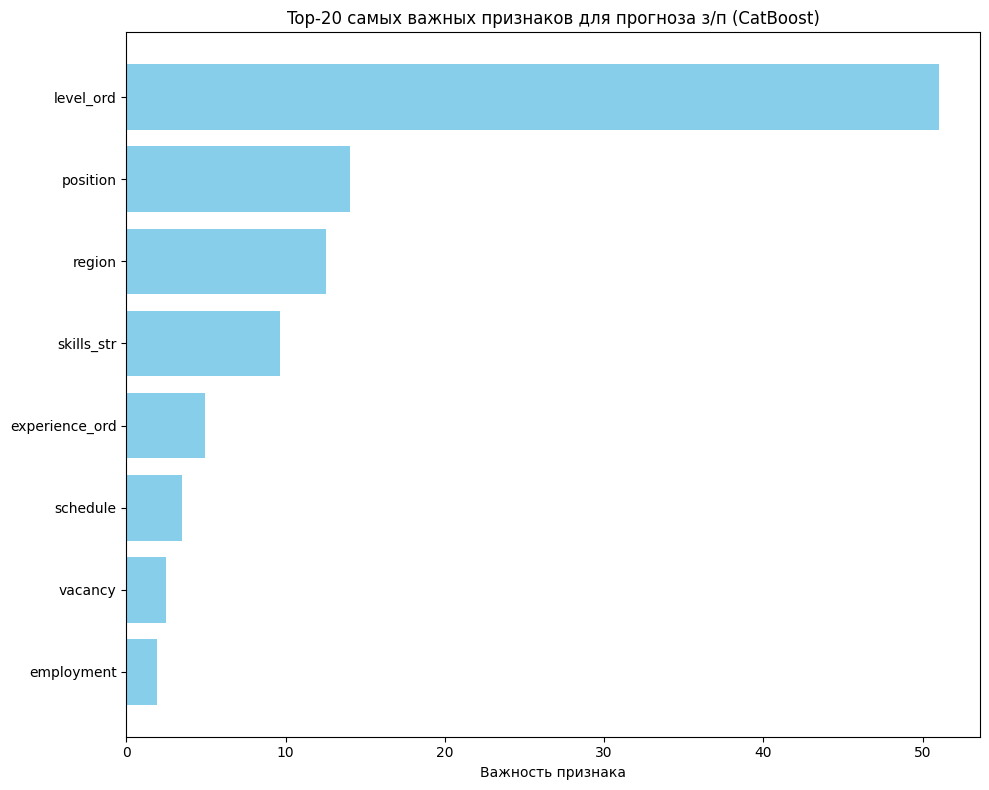

In [20]:
# –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = model.get_feature_importance()
# –°–æ—Ä—Ç–∏—Ä—É–µ–º –∏ –ø–æ–ª—É—á–∞–µ–º —Ç–æ–ø-20
indices = np.argsort(feature_importance)[::-1][:20]
names = [features[i] for i in indices]
scores = [feature_importance[i] for i in indices]

# –°–æ–∑–¥–∞–µ–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–π bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(names)), scores, align='center', color='skyblue')
plt.yticks(range(len(names)), names)
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.title('Top-20 —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –∑/–ø (CatBoost)')
# –í–∞–∂–Ω—ã–π –º–æ–º–µ–Ω—Ç: –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –æ—Å—å Y, —á—Ç–æ–±—ã —Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –±—ã–ª —Å–≤–µ—Ä—Ö—É
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# –ø—Ä–æ–±—É–µ–º –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã

import optuna
from optuna.samplers import TPESampler
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# –§–∏–∫—Å–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
top_skills = 30
top_vacancies = 10000

# –°–ø–∏—Å–æ–∫ –ø–æ–∑–∏—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–ª—è–µ–º
allowed_positions = [
    "–ê–Ω–∞–ª–∏—Ç–∏–∫",
    "–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫",
    "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤",
    "–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å"
]
allowed_positions2 = [
    "–ê–Ω–∞–ª–∏—Ç–∏–∫",
    "–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–î–∞—Ç–∞-—Å–∞–π–µ–Ω—Ç–∏—Å—Ç",
    "–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫",
    "–ü—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫",
    "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤",
    "–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å",
    '–¢–µ—Å—Ç–∏—Ä–æ–≤—â–∏–∫',
    '–ú–µ–Ω–µ–¥–∂–µ—Ä –ø—Ä–æ–¥—É–∫—Ç–∞',
    '–°–∏—Å—Ç–µ–º–Ω—ã–π –∏–Ω–∂–µ–Ω–µ—Ä',
    'BI-–∞–Ω–∞–ª–∏—Ç–∏–∫, –∞–Ω–∞–ª–∏—Ç–∏–∫ –¥–∞–Ω–Ω—ã—Ö',
    '–ú–µ—Ç–æ–¥–æ–ª–æ–≥',
    '–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –≥—Ä—É–ø–ø—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏'

]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö
def prepare_data(df_train_result, top_skills, top_vacancies):
    # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N —Å–∫–∏–ª–æ–≤
    df_skills_filtered = filtered_skills_top_n(df_train_result.copy(), top_skills)
    df_skills_filtered = df_skills_filtered[df_skills_filtered['mapped_skills'].apply(lambda x: len(x) > 0)]
    
    # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N –≤–∞–∫–∞–Ω—Å–∏–π –≤–Ω—É—Ç—Ä–∏ –ø–æ–∑–∏—Ü–∏–∏
    def filter_top_vacancies(group, n=top_vacancies):
        vac_counts = group['vacancy_clustered'].value_counts()
        top_vacancies = vac_counts.head(n).index.tolist()
        return group[group['vacancy_clustered'].isin(top_vacancies)]
    
    df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)
    df_filtered = df_filtered[df_filtered['position'].isin(allowed_positions)] # 
    
    # –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    df_temp = df_filtered.copy()
    
    # –û—á–∏—Å—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
    positions_temp = df_temp['position'].dropna().unique()
    for pos in positions_temp:
        pos_mask = df_temp['position'] == pos
        clean_series = process_series(df_temp.loc[pos_mask, 'salary from'], 'salary from', pos)
        if clean_series is not None:
            df_temp.loc[clean_series.index, 'salary from norm'] = clean_series
    
    # –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏
    df_temp = df_temp.dropna(subset=['salary from norm'])
    
    if df_temp.empty:
        return None, None, None, None
    
    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    y = df_temp['salary from norm']
    
    # –ü–æ—Ä—è–¥–∫–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
    experience_order = {
        '–ù–µ—Ç –æ–ø—ã—Ç–∞': 0,
        '1‚Äì3 –≥–æ–¥–∞': 1,
        '3‚Äì6 –ª–µ—Ç': 2,
        '–ë–æ–ª–µ–µ 6 –ª–µ—Ç': 3,
        'Unknown': -1
    }

    level_order = {
        'Trainee': 0,
        'Junior': 1,
        'Middle': 2,
        'Senior': 3,
        'Lead': 4,
        'Chief': 5,
        'Unknown': -1
    }
    
    df_temp['experience_ord'] = df_temp['experience'].map(experience_order)
    df_temp['level_ord'] = df_temp['level'].map(level_order)
    df_temp['skills_str'] = df_temp['mapped_skills'].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
    )
    
    features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'skills_str', 'region'] # , 'vacancy_clustered'
    X = df_temp[features]
    
    cat_features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'region'] # , 'vacancy_clustered'
    text_features = ['skills_str']
    
    return X, y, cat_features, text_features

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è train/test split
def create_train_test_split(X, y, cat_features, text_features):
    try:
        splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        for train_idx, test_idx in splitter.split(X, X['position']):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            train_pool = Pool(
                data=X_train,
                label=y_train,
                cat_features=cat_features,
                text_features=text_features
            )
            
            test_pool = Pool(
                data=X_test,
                label=y_test,
                cat_features=cat_features,
                text_features=text_features
            )
            
            return train_pool, test_pool, X_test, y_test
            
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ split: {e}")
        return None, None, None, None

# –§—É–Ω–∫—Ü–∏—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ Optuna
def objective(trial):
    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    X, y, cat_features, text_features = prepare_data(df_train_result.copy(), top_skills, top_vacancies)
    if X is None:
        return float('inf')
    
    # –°–æ–∑–¥–∞–Ω–∏–µ train/test split
    train_pool, test_pool, X_test, y_test = create_train_test_split(X, y, cat_features, text_features)
    if train_pool is None:
        return float('inf')
    
    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'verbose': False
    }
    
    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model = CatBoostRegressor(
        task_type='GPU',
        **params
    )
    
    try:
        model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100, verbose=0)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        return mae
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏: {e}")
        return float('inf')

# –û—Å–Ω–æ–≤–Ω–æ–π –∫–æ–¥ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
print("–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö...")
X, y, cat_features, text_features = prepare_data(df_train_result.copy(), top_skills, top_vacancies)
print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: {X.shape if X is not None else 0}")

# –°–æ–∑–¥–∞–µ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ Optuna
study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)

print("–ó–∞–ø—É—Å–∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...")
study.optimize(objective, n_trials=40, show_progress_bar=True)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
print(study.best_params)
print(f"–õ—É—á—à–µ–µ MAE: {study.best_value:.4f}")

# –û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
print("–û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏...")

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
X, y, cat_features, text_features = prepare_data(df_train_result.copy(), top_skills, top_vacancies)
train_pool, test_pool, X_test, y_test = create_train_test_split(X, y, cat_features, text_features)

# –î–æ–±–∞–≤–ª—è–µ–º —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∫ –ª—É—á—à–∏–º
best_params = study.best_params.copy()
best_params['task_type'] = 'GPU'
best_params['verbose'] = 100

final_model = CatBoostRegressor(**best_params)
final_model.fit(train_pool, eval_set=test_pool)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞
y_pred = final_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"–§–∏–Ω–∞–ª—å–Ω–æ–µ MAE: {final_mae:.4f}")
print(f"–§–∏–Ω–∞–ª—å–Ω–æ–µ R2: {final_r2:.4f}")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
final_model.save_model('catboost_optimized_model.cbm')

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
best_params_df = pd.DataFrame([study.best_params])
best_params_df.to_csv('best_hyperparameters.csv', index=False)

print("–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞!")

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö...


[I 2025-09-07 18:17:10,226] A new study created in memory with name: no-name-46c717ab-4083-42b3-8f25-f51515eaee24


–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: (8653, 7)
–ó–∞–ø—É—Å–∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-09-07 18:17:15,421] Trial 0 finished with value: 17054.61365094484 and parameters: {'iterations': 1062, 'learning_rate': 0.2536999076681772, 'depth': 9, 'l2_leaf_reg': 6.387926357773329, 'random_strength': 1.6445845403801216, 'bagging_temperature': 0.15599452033620265, 'border_count': 45, 'min_data_in_leaf': 87, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 17054.61365094484.
[I 2025-09-07 18:17:18,865] Trial 1 finished with value: 16994.8721793494 and parameters: {'iterations': 1955, 'learning_rate': 0.16967533607196555, 'depth': 5, 'l2_leaf_reg': 2.636424704863906, 'random_strength': 1.915704647548995, 'bagging_temperature': 0.3042422429595377, 'border_count': 149, 'min_data_in_leaf': 44, 'grow_policy': 'Depthwise'}. Best is trial 1 with value: 16994.8721793494.
[I 2025-09-07 18:17:49,248] Trial 2 finished with value: 16879.161008061797 and parameters: {'iterations': 938, 'learning_rate': 0.03476649150592621, 'depth': 7, 'l2_leaf_reg': 8.066583652537123, 'random_st

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [42]:
print(mape)

0.23020324009482962


–±–µ–∑ –≤–∞–∫–∞–Ω—Å–∏–π –Ω–∞ –º–∞–ø–µ–¥ —Å–∫–∏–ª—Å 19 –ø–æ–∑–∏—Ü–∏–π


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

{'iterations': 1777, 'learning_rate': 0.19104569839845126, 'depth': 10, 'l2_leaf_reg': 7.112900398848464, 'random_strength': 1.0690517989346735, 'bagging_temperature': 0.6506039769871561, 'border_count': 125, 'min_data_in_leaf': 9, 'grow_policy': 'Depthwise'}


–õ—É—á—à–µ–µ MAE: 24514.4810

–§–∏–Ω–∞–ª—å–Ω–æ–µ MAE: 24644.3104
–§–∏–Ω–∞–ª—å–Ω–æ–µ R2: 0.8126

mape 0.23


_____________________________________________________________

–ë–µ–∑ –≤–∞–∫–∞–Ω—Å–∏–π –Ω–∞ mapped_skills

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

{'iterations': 1366, 'learning_rate': 0.029480499584883798, 'depth': 8, 'l2_leaf_reg': 9.306348992747079, 'random_strength': 9.269354649954655, 'bagging_temperature': 0.24923876946619955, 'border_count': 139, 'min_data_in_leaf': 42, 'grow_policy': 'Lossguide'}


–§–∏–Ω–∞–ª—å–Ω–æ–µ MAE: 16720.3484
–§–∏–Ω–∞–ª—å–Ω–æ–µ R2: 0.7576

_________________________________________________________________


vacancy_clustered

–§–∏–Ω–∞–ª—å–Ω–æ–µ MAE: 15325.9098
–§–∏–Ω–∞–ª—å–Ω–æ–µ R2: 0.7464


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
{'iterations': 1737, 'learning_rate': 0.07317458448454589, 'depth': 9, 'l2_leaf_reg': 4.102561463255634, 'random_strength': 2.810303096814648, 'bagging_temperature': 0.8199733454878877, 'border_count': 119, 'min_data_in_leaf': 7, 'grow_policy': 'Lossguide'}
–õ—É—á—à–µ–µ MAE: 15325.9098

_____________________________________________

–î–ª—è —Å–ø–∏—Å–∫–∞ 1+2 (–ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ –ø–æ–∑–∏—Ü–∏–π)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
{'iterations': 886, 'learning_rate': 0.16298226973020347, 'depth': 10, 'l2_leaf_reg': 6.814578059264777, 'random_strength': 6.602968345275037, 'bagging_temperature': 0.5272972303224925, 'border_count': 198, 'min_data_in_leaf': 56, 'grow_policy': 'Depthwise'}
–õ—É—á—à–µ–µ MAE: 21395.5308
–§–∏–Ω–∞–ª—å–Ω–æ–µ MAE: 21451.1697
–§–∏–Ω–∞–ª—å–Ω–æ–µ R2: 0.8416


–î–ª—è —Å–ø–∏—Å–∫–∞ 2


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
{'iterations': 1707, 'learning_rate': 0.24046147341775423, 'depth': 10, 'l2_leaf_reg': 4.168882735486937, 'random_strength': 4.920968499142594, 'bagging_temperature': 0.8493307771263665, 'border_count': 119, 'min_data_in_leaf': 10, 'grow_policy': 'Depthwise'}
–õ—É—á—à–µ–µ MAE: 21155.7671

–§–∏–Ω–∞–ª—å–Ω–æ–µ MAE: 21117.6683
–§–∏–Ω–∞–ª—å–Ω–æ–µ R2: 0.8386

–î–ª—è —Å–ø–∏—Å–∫–∞ 1

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
{'iterations': 1404, 'learning_rate': 0.14647974385325152, 'depth': 9, 'l2_leaf_reg': 1.7865444706705154, 'random_strength': 0.8393042307586931, 'bagging_temperature': 0.9454845290374145, 'border_count': 104, 'min_data_in_leaf': 10, 'grow_policy': 'Lossguide'}
–õ—É—á—à–µ–µ MAE: 15539.3131

In [8]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
import matplotlib.pyplot as plt

# –ò—Å—Ç–æ—Ä–∏—è trials
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

# –í–∞–∂–Ω–æ—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
fig = optuna.visualization.plot_param_importances(study)
fig.show()

# –ü–∞—Ä–∞–ª–ª–µ–ª—å–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö trials
trials_df = study.trials_dataframe()
trials_df.to_csv('optuna_trials.csv', index=False)

In [7]:
def filtered_skills_top_n(df_train_result, n):
    """
    –§–∏–ª—å—Ç—Ä—É–µ—Ç –Ω–∞–≤—ã–∫–∏, –æ—Å—Ç–∞–≤–ª—è—è —Ç–æ–ª—å–∫–æ N –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –Ω–∞–≤—ã–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –ø–æ–∑–∏—Ü–∏–∏.
    
    :param df_skills_filtered: –í—Ö–æ–¥—è—â–∏–π DataFrame —Å –∫–æ–ª–æ–Ω–∫–∞–º–∏ 'position' –∏ 'skills'.
    :param n: –ß–∏—Å–ª–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –Ω–∞–≤—ã–∫–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –Ω—É–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å.
    :return: –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–π DataFrame —Å —Å–æ–∫—Ä–∞—â—ë–Ω–Ω—ã–º —Å–ø–∏—Å–∫–æ–º –Ω–∞–≤—ã–∫–æ–≤.
    """
    
    result_df = df_train_result.copy()
    #display(result_df['skills'])
    # –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –∫–∞–∂–¥—É—é —É–Ω–∏–∫–∞–ª—å–Ω—É—é –¥–æ–ª–∂–Ω–æ—Å—Ç—å
    for pos in result_df['position'].unique():
        # –ú–∞—Å–∫–∞ –¥–ª—è –≤—ã–±–æ—Ä–∞ —Å—Ç—Ä–æ–∫ —Å –Ω—É–∂–Ω–æ–π –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é
        mask = result_df['position'] == pos
        
        # –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –Ω–∞–≤—ã–∫–∏ –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Å–ø–∏—Å–æ–∫
        skills_lists = result_df.loc[mask, 'mapped_skills']
        all_skills = [skill for sublist in skills_lists for skill in sublist]
        
        # –°—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –ø–æ—è–≤–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–≤—ã–∫–∞
        skill_counts = Counter(all_skills)
        
        # –ë–µ—Ä—ë–º —Ç–æ–ø-n –Ω–∞–≤—ã–∫–æ–≤
        top_n_skills = set([skill for skill, _ in skill_counts.most_common(n)])
        
        # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ–∏–ª—å—Ç—Ä –∫ —Å–ø–∏—Å–∫—É –Ω–∞–≤—ã–∫–æ–≤
        result_df.loc[mask, 'mapped_skills'] = skills_lists.apply(
            lambda skill_list: [s for s in skill_list if s in top_n_skills]
        )
        #display(result_df['skills'])
    return result_df

üöÄ –ó–∞–ø—É—Å–∫ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ –æ–±—É—á–µ–Ω–∏—è...
1. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N —Å–∫–∏–ª–æ–≤...
2. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N –≤–∞–∫–∞–Ω—Å–∏–π...
3. –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π...
4. –§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (8653, 25)
   –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–∑–∏—Ü–∏—è–º:
position
–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏             2646
–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä                      1810
–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫                           1247
–ê–Ω–∞–ª–∏—Ç–∏–∫                                     1090
–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤                         554
–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏     525
–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫                               323
–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä                               278
–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å                      

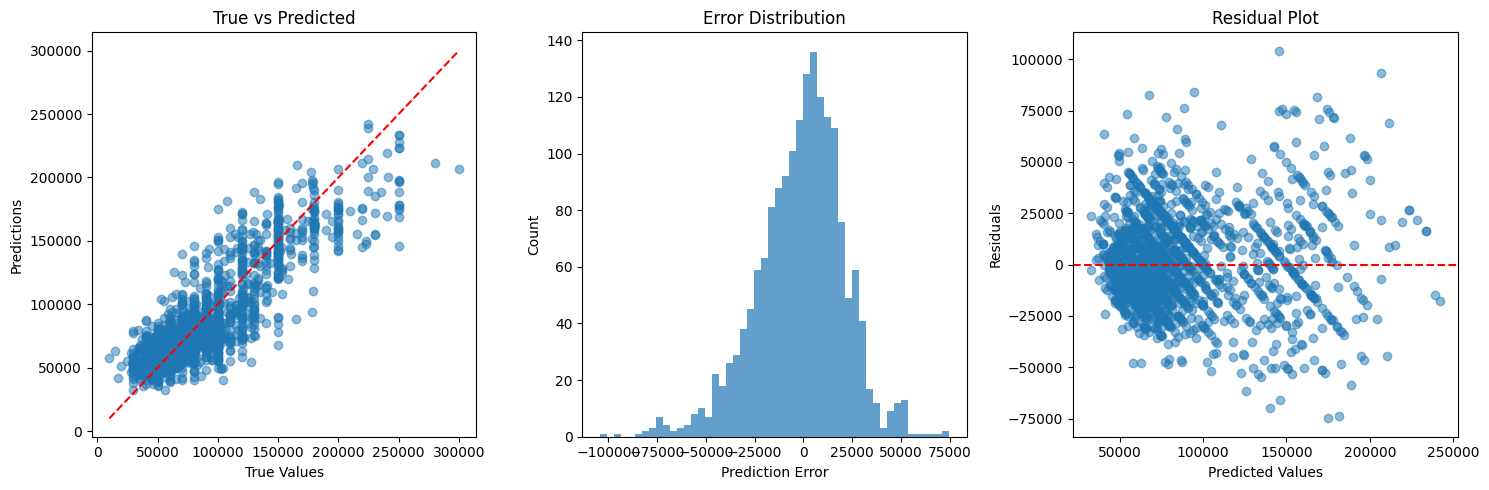

9. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤...


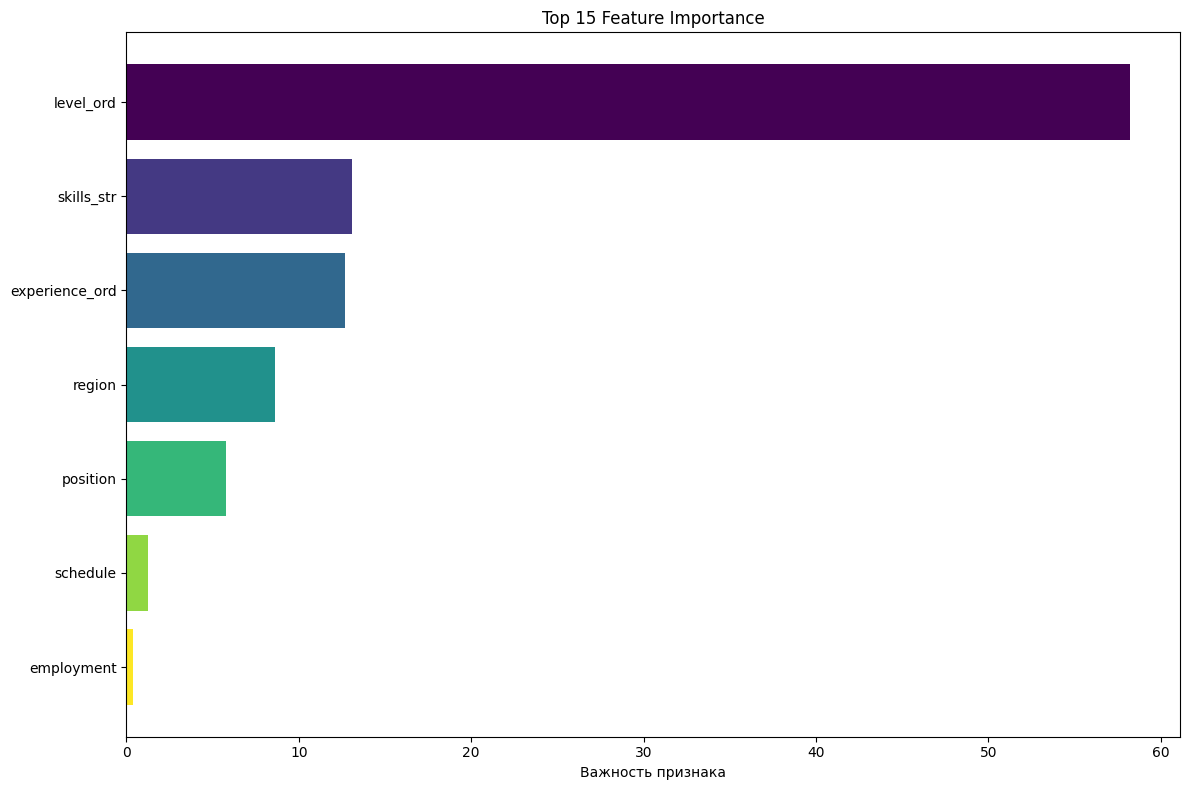

   –¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
    5. level_ord           : 58.2094
    6. skills_str          : 13.1000
    2. experience_ord      : 12.6733
    7. region              : 8.5940
    1. position            : 5.7553
    3. schedule            : 1.2767
    4. employment          : 0.3913
   –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ feature_importance.csv
8. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤...
   –ú–æ–¥–µ–ª—å –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!
‚úÖ –§–∏–Ω–∞–ª—å–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –∑–∞–≤–µ—Ä—à–µ–Ω!
üìä –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏:
   MAE: 17218.23
   R¬≤: 0.7441
   MAPE: 0.2229
   –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 8653
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 7


In [17]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
top_skills = 30
top_vacancies = 5000

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–∑ Optuna
best_params = {
    'iterations': 1404,
    'learning_rate': 0.14647974385325152,
    'depth': 9,
    'l2_leaf_reg': 1.7865444706705154,
    'random_strength': 0.8393042307586931,
    'bagging_temperature': 0.9454845290374145,
    'border_count': 104,
    'min_data_in_leaf': 10,
    'grow_policy': 'Lossguide',
    'task_type': 'GPU',
    'verbose': 100
}

best_params_no_vac = {'iterations': 1366, 'learning_rate': 0.029480499584883798, 'depth': 8, 'l2_leaf_reg': 9.306348992747079, 
 'random_strength': 9.269354649954655, 'bagging_temperature': 0.24923876946619955, 
 'border_count': 139, 'min_data_in_leaf': 42, 'grow_policy': 'Lossguide'}

# –°–ø–∏—Å–æ–∫ –ø–æ–∑–∏—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–ª—è–µ–º
allowed_positions = [
    "–ê–Ω–∞–ª–∏—Ç–∏–∫",
    "–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫",
    "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤",
    "–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å"
    #"–¢–µ—Å—Ç–∏—Ä–æ–≤—â–∏–∫",
    #"–ü—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫"
]

def prepare_final_data(df):
    """–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞"""
    print("1. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N —Å–∫–∏–ª–æ–≤...")
    df_skills_filtered = filtered_skills_top_n(df.copy(), top_skills)
    df_skills_filtered = df_skills_filtered[df_skills_filtered['mapped_skills'].apply(lambda x: len(x) > 0)]
    
    print("2. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N –≤–∞–∫–∞–Ω—Å–∏–π...")
    def filter_top_vacancies(group, n=top_vacancies):
        vac_counts = group['vacancy_clustered'].value_counts()
        top_vacancies = vac_counts.head(n).index.tolist()
        return group[group['vacancy_clustered'].isin(top_vacancies)]
    
    df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)
    df_filtered = df_filtered[df_filtered['position'].isin(allowed_positions)]
    
    print("3. –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π...")
    df_temp = df_filtered.copy()
    
    # –û—á–∏—Å—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
    positions_temp = df_temp['position'].dropna().unique()
    for pos in positions_temp:
        pos_mask = df_temp['position'] == pos
        clean_series = process_series(df_temp.loc[pos_mask, 'salary from'], 'salary from', pos)
        if clean_series is not None:
            df_temp.loc[clean_series.index, 'salary from norm'] = clean_series
    
    # –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏
    df_temp = df_temp.dropna(subset=['salary from norm'])
    
    print(f"4. –§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df_temp.shape}")
    print(f"   –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–∑–∏—Ü–∏—è–º:\n{df_temp['position'].value_counts()}")
    
    return df_temp

def create_features(df):
    """–°–æ–∑–¥–∞–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤"""
    # –ü–æ—Ä—è–¥–∫–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
    experience_order = {
        '–ù–µ—Ç –æ–ø—ã—Ç–∞': 0,
        '1‚Äì3 –≥–æ–¥–∞': 1,
        '3‚Äì6 –ª–µ—Ç': 2,
        '–ë–æ–ª–µ–µ 6 –ª–µ—Ç': 3,
        'Unknown': -1
    }

    level_order = {
        'Trainee': 0,
        'Junior': 1,
        'Middle': 2,
        'Senior': 3,
        'Lead': 4,
        'Chief': 5,
        'Unknown': -1
    }
    
    df['experience_ord'] = df['experience'].map(experience_order).fillna(-1).astype(int)
    df['level_ord'] = df['level'].map(level_order).fillna(-1).astype(int)
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ skills –≤ —Å—Ç—Ä–æ–∫–∏
    df['skills_str'] = df['mapped_skills'].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
    )
    
    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
    for col in ['schedule', 'employment', 'region']:
        df[col] = df[col].fillna('Unknown')
    
    features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'skills_str', 'region'] # , 'vacancy_clustered'
    X = df[features]
    y = df['salary from norm']
    
    cat_features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'region'] # , 'vacancy_clustered'
    text_features = ['skills_str']
    
    return X, y, cat_features, text_features

def train_final_model(X, y, cat_features, text_features):
    """–û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏"""
    print("5. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test...")
    
    # –°—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(X, X['position']):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    print(f"   Train size: {X_train.shape[0]}")
    print(f"   Test size: {X_test.shape[0]}")
    
    # –°–æ–∑–¥–∞–Ω–∏–µ Pool –æ–±—ä–µ–∫—Ç–æ–≤
    train_pool = Pool(
        data=X_train,
        label=y_train,
        cat_features=cat_features,
        text_features=text_features
    )
    
    test_pool = Pool(
        data=X_test,
        label=y_test,
        cat_features=cat_features,
        text_features=text_features
    )
    
    print("6. –û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏...")
    model = CatBoostRegressor(**best_params_no_vac) # best_params
    
    model.fit(
        train_pool,
        eval_set=test_pool,
        early_stopping_rounds=100,
        use_best_model=True
    )
    
    return model, X_test, y_test

def evaluate_model(model, X_test, y_test):
    """–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏"""
    print("7. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏...")
    
    y_pred = model.predict(X_test)
    
    # –ú–µ—Ç—Ä–∏–∫–∏
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"   MAE: {mae:.2f}")
    print(f"   R¬≤: {r2:.4f}")
    print(f"   MAPE: {mape:.4f}")
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted')
    
    plt.subplot(1, 3, 2)
    errors = y_pred - y_test
    plt.hist(errors, bins=50, alpha=0.7)
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title('Error Distribution')
    
    plt.subplot(1, 3, 3)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    plt.tight_layout()
    plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return mae, r2, mape

def save_model_and_artifacts(model, X, cat_features, text_features):
    """–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤"""
    print("8. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤...")
    
    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model.save_model('final_catboost_model.cbm')
    
    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
    feature_info = {
        'cat_features': cat_features,
        'text_features': text_features,
        'all_features': X.columns.tolist()
    }
    joblib.dump(feature_info, 'feature_info.pkl')
    
    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    pd.DataFrame([best_params]).to_csv('best_params.csv', index=False)
    
    print("   –ú–æ–¥–µ–ª—å –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!")

def analyze_feature_importance(model, X):
    """–ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤"""
    print("9. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤...")
    
    try:
        # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        feature_importance = model.get_feature_importance()
        feature_names = X.columns.tolist()
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç
        if len(feature_importance) != len(feature_names):
            print(f"   –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç: features={len(feature_names)}, importance={len(feature_importance)}")
            # –ë–µ—Ä–µ–º –º–∏–Ω–∏–º—É–º –∏–∑ –¥–≤—É—Ö
            min_len = min(len(feature_names), len(feature_importance))
            feature_names = feature_names[:min_len]
            feature_importance = feature_importance[:min_len]
        
        # –°–æ–∑–¥–∞–µ–º DataFrame —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        # –§–∏–ª—å—Ç—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é
        importance_df = importance_df[importance_df['importance'] > 0]
        
        if len(importance_df) == 0:
            print("   –í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç –Ω—É–ª–µ–≤—É—é –≤–∞–∂–Ω–æ—Å—Ç—å")
            return importance_df
        
        # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        try:
            plt.figure(figsize=(12, 8))
            top_features = importance_df.head(15)
            
            # –ü—Ä–æ—Å—Ç–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –±–µ–∑ seaborn
            colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
            bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors)
            
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
            plt.title('Top 15 Feature Importance')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as viz_error:
            print(f"   –û—à–∏–±–∫–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏: {viz_error}")
            print("   –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –±–µ–∑ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...")
        
        print("   –¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
        for i, row in importance_df.head(10).iterrows():
            print(f"   {i+1:2d}. {row['feature']:20s}: {row['importance']:.4f}")
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV
        importance_df.to_csv('feature_importance.csv', index=False)
        print("   –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ feature_importance.csv")
        
        return importance_df
        
    except Exception as e:
        print(f"   –û—à–∏–±–∫–∞ –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {e}")
        import traceback
        traceback.print_exc()
        return pd.DataFrame()

# –û—Å–Ω–æ–≤–Ω–æ–π –ø–∞–π–ø–ª–∞–π–Ω
print("üöÄ –ó–∞–ø—É—Å–∫ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ –æ–±—É—á–µ–Ω–∏—è...")
print("=" * 50)

# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_final = prepare_final_data(df_train_result.copy())

# 2. –°–æ–∑–¥–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X, y, cat_features, text_features = create_features(df_final)

# 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model, X_test, y_test = train_final_model(X, y, cat_features, text_features)

# 4. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
mae, r2, mape = evaluate_model(model, X_test, y_test)

# 5. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importance_df = analyze_feature_importance(model, X)

# 6. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
save_model_and_artifacts(model, X, cat_features, text_features)

print("=" * 50)
print("‚úÖ –§–∏–Ω–∞–ª—å–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –∑–∞–≤–µ—Ä—à–µ–Ω!")
print(f"üìä –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏:")
print(f"   MAE: {mae:.2f}")
print(f"   R¬≤: {r2:.4f}")
print(f"   MAPE: {mape:.4f}")
print(f"   –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {X.shape[0]}")
print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {X.shape[1]}")

–ë–µ–∑ Vacancy

üìä –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏:


   MAE: 16901.79


   R¬≤: 0.7534


   MAPE: 0.2205


   –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 8653
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 7

30 vacancy

‚úÖ –§–∏–Ω–∞–ª—å–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –∑–∞–≤–µ—Ä—à–µ–Ω!

üìä –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏:
   MAE: 15539.31

   R¬≤: 0.7704

   MAPE: 0.2044

   –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 4131
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 8

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
top_skills = 30
top_vacancies = 5000

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–∑ Optuna
best_params = {
    'iterations': 1404,
    'learning_rate': 0.14647974385325152,
    'depth': 9,
    'l2_leaf_reg': 1.7865444706705154,
    'random_strength': 0.8393042307586931,
    'bagging_temperature': 0.9454845290374145,
    'border_count': 104,
    'min_data_in_leaf': 10,
    'grow_policy': 'Lossguide',
    'task_type': 'GPU',
    'verbose': 100
}

best_params_no_vac = {'iterations': 1366, 'learning_rate': 0.029480499584883798, 'depth': 8, 'l2_leaf_reg': 9.306348992747079, 
 'random_strength': 9.269354649954655, 'bagging_temperature': 0.24923876946619955, 
 'border_count': 139, 'min_data_in_leaf': 42, 'grow_policy': 'Lossguide'}

# –°–ø–∏—Å–æ–∫ –ø–æ–∑–∏—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–ª—è–µ–º
allowed_positions = [
    "–ê–Ω–∞–ª–∏—Ç–∏–∫",
    "–ë–∏–∑–Ω–µ—Å-–∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–î–∏–∑–∞–π–Ω–µ—Ä, —Ö—É–¥–æ–∂–Ω–∏–∫",
    "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫",
    "–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø—Ä–æ–µ–∫—Ç–æ–≤",
    "–°–µ—Ç–µ–≤–æ–π –∏–Ω–∂–µ–Ω–µ—Ä",
    "–°–∏—Å—Ç–µ–º–Ω—ã–π –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏",
    "–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –ø–∏—Å–∞—Ç–µ–ª—å"
    #"–¢–µ—Å—Ç–∏—Ä–æ–≤—â–∏–∫",
    #"–ü—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫"
]

def prepare_final_data(df):
    """–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞"""
    print("1. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N —Å–∫–∏–ª–æ–≤...")
    df_skills_filtered = filtered_skills_top_n(df.copy(), top_skills)
    df_skills_filtered = df_skills_filtered[df_skills_filtered['mapped_skills'].apply(lambda x: len(x) > 0)]
    
    print("2. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–æ–ø-N –≤–∞–∫–∞–Ω—Å–∏–π...")
    def filter_top_vacancies(group, n=top_vacancies):
        vac_counts = group['vacancy_clustered'].value_counts()
        top_vacancies = vac_counts.head(n).index.tolist()
        return group[group['vacancy_clustered'].isin(top_vacancies)]
    
    df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)
    df_filtered = df_filtered[df_filtered['position'].isin(allowed_positions)]
    
    print("3. –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π...")
    df_temp = df_filtered.copy()
    
    # –û—á–∏—Å—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
    positions_temp = df_temp['position'].dropna().unique()
    for pos in positions_temp:
        pos_mask = df_temp['position'] == pos
        clean_series = process_series(df_temp.loc[pos_mask, 'salary to'], 'salary to', pos)
        if clean_series is not None:
            df_temp.loc[clean_series.index, 'salary to norm'] = clean_series
    
    # –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏
    df_temp = df_temp.dropna(subset=['salary to norm'])
    
    print(f"4. –§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df_temp.shape}")
    print(f"   –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–∑–∏—Ü–∏—è–º:\n{df_temp['position'].value_counts()}")
    
    return df_temp

def create_features(df):
    """–°–æ–∑–¥–∞–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤"""
    # –ü–æ—Ä—è–¥–∫–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
    experience_order = {
        '–ù–µ—Ç –æ–ø—ã—Ç–∞': 0,
        '1‚Äì3 –≥–æ–¥–∞': 1,
        '3‚Äì6 –ª–µ—Ç': 2,
        '–ë–æ–ª–µ–µ 6 –ª–µ—Ç': 3,
        'Unknown': -1
    }

    level_order = {
        'Trainee': 0,
        'Junior': 1,
        'Middle': 2,
        'Senior': 3,
        'Lead': 4,
        'Chief': 5,
        'Unknown': -1
    }
    
    df['experience_ord'] = df['experience'].map(experience_order).fillna(-1).astype(int)
    df['level_ord'] = df['level'].map(level_order).fillna(-1).astype(int)
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ skills –≤ —Å—Ç—Ä–æ–∫–∏
    df['skills_str'] = df['mapped_skills'].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x)
    )
    
    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
    for col in ['schedule', 'employment', 'region']:
        df[col] = df[col].fillna('Unknown')
    
    features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'skills_str', 'region'] # , 'vacancy_clustered'
    X = df[features]
    y = df['salary to norm']
    
    cat_features = ['position', 'experience_ord', 'schedule', 'employment', 'level_ord', 'region'] # , 'vacancy_clustered'
    text_features = ['skills_str']
    
    return X, y, cat_features, text_features

def train_final_model(X, y, cat_features, text_features):
    """–û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏"""
    print("5. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test...")
    
    # –°—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(X, X['position']):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    print(f"   Train size: {X_train.shape[0]}")
    print(f"   Test size: {X_test.shape[0]}")
    
    # –°–æ–∑–¥–∞–Ω–∏–µ Pool –æ–±—ä–µ–∫—Ç–æ–≤
    train_pool = Pool(
        data=X_train,
        label=y_train,
        cat_features=cat_features,
        text_features=text_features
    )
    
    test_pool = Pool(
        data=X_test,
        label=y_test,
        cat_features=cat_features,
        text_features=text_features
    )
    
    print("6. –û–±—É—á–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏...")
    model = CatBoostRegressor(**best_params_no_vac) # best_params
    
    model.fit(
        train_pool,
        eval_set=test_pool,
        early_stopping_rounds=100,
        use_best_model=True
    )
    
    return model, X_test, y_test

def evaluate_model(model, X_test, y_test):
    """–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏"""
    print("7. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏...")
    
    y_pred = model.predict(X_test)
    
    # –ú–µ—Ç—Ä–∏–∫–∏
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"   MAE: {mae:.2f}")
    print(f"   R¬≤: {r2:.4f}")
    print(f"   MAPE: {mape:.4f}")
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted')
    
    plt.subplot(1, 3, 2)
    errors = y_pred - y_test
    plt.hist(errors, bins=50, alpha=0.7)
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title('Error Distribution')
    
    plt.subplot(1, 3, 3)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    plt.tight_layout()
    plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return mae, r2, mape

def save_model_and_artifacts(model, X, cat_features, text_features):
    """–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤"""
    print("8. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤...")
    
    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model.save_model('final_catboost_model.cbm')
    
    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
    feature_info = {
        'cat_features': cat_features,
        'text_features': text_features,
        'all_features': X.columns.tolist()
    }
    joblib.dump(feature_info, 'feature_info.pkl')
    
    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    pd.DataFrame([best_params]).to_csv('best_params.csv', index=False)
    
    print("   –ú–æ–¥–µ–ª—å –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!")

def analyze_feature_importance(model, X):
    """–ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤"""
    print("9. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤...")
    
    try:
        # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        feature_importance = model.get_feature_importance()
        feature_names = X.columns.tolist()
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç
        if len(feature_importance) != len(feature_names):
            print(f"   –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç: features={len(feature_names)}, importance={len(feature_importance)}")
            # –ë–µ—Ä–µ–º –º–∏–Ω–∏–º—É–º –∏–∑ –¥–≤—É—Ö
            min_len = min(len(feature_names), len(feature_importance))
            feature_names = feature_names[:min_len]
            feature_importance = feature_importance[:min_len]
        
        # –°–æ–∑–¥–∞–µ–º DataFrame —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        # –§–∏–ª—å—Ç—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é
        importance_df = importance_df[importance_df['importance'] > 0]
        
        if len(importance_df) == 0:
            print("   –í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç –Ω—É–ª–µ–≤—É—é –≤–∞–∂–Ω–æ—Å—Ç—å")
            return importance_df
        
        # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        try:
            plt.figure(figsize=(12, 8))
            top_features = importance_df.head(15)
            
            # –ü—Ä–æ—Å—Ç–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –±–µ–∑ seaborn
            colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
            bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors)
            
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
            plt.title('Top 15 Feature Importance')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as viz_error:
            print(f"   –û—à–∏–±–∫–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏: {viz_error}")
            print("   –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –±–µ–∑ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...")
        
        print("   –¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
        for i, row in importance_df.head(10).iterrows():
            print(f"   {i+1:2d}. {row['feature']:20s}: {row['importance']:.4f}")
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV
        importance_df.to_csv('feature_importance.csv', index=False)
        print("   –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ feature_importance.csv")
        
        return importance_df
        
    except Exception as e:
        print(f"   –û—à–∏–±–∫–∞ –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {e}")
        import traceback
        traceback.print_exc()
        return pd.DataFrame()

# –û—Å–Ω–æ–≤–Ω–æ–π –ø–∞–π–ø–ª–∞–π–Ω
print("üöÄ –ó–∞–ø—É—Å–∫ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ –æ–±—É—á–µ–Ω–∏—è...")
print("=" * 50)

# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_final = prepare_final_data(df_train_result.copy())

# 2. –°–æ–∑–¥–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X, y, cat_features, text_features = create_features(df_final)

# 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model, X_test, y_test = train_final_model(X, y, cat_features, text_features)

# 4. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
mae, r2, mape = evaluate_model(model, X_test, y_test)

# 5. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importance_df = analyze_feature_importance(model, X)

# 6. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
save_model_and_artifacts(model, X, cat_features, text_features)

print("=" * 50)
print("‚úÖ –§–∏–Ω–∞–ª—å–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –∑–∞–≤–µ—Ä—à–µ–Ω!")
print(f"üìä –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏:")
print(f"   MAE: {mae:.2f}")
print(f"   R¬≤: {r2:.4f}")
print(f"   MAPE: {mape:.4f}")
print(f"   –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {X.shape[0]}")
print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {X.shape[1]}")

–¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
5. level_ord           : 50.8892
6. skills_str          : 18.7869
1. position            : 10.1557
2. experience_ord      : 9.8037
7. region              : 9.1756
3. schedule            : 0.9742
4. employment          : 0.2147
–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ feature_importance.csv


==================================================


‚úÖ –§–∏–Ω–∞–ª—å–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –∑–∞–≤–µ—Ä—à–µ–Ω!

üìä –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏:

   MAE: 21367.33

   R¬≤: 0.6847

   MAPE: 0.2525

   –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 8582
   
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 7